## OmniFold

In [1]:
from unfold import *

import os
os.environ['CUDA_VISIBLE_DEVICES']="2"

import tensorflow as tf
import tensorflow.keras.backend as K
tf.random.set_seed(1234)
np.random.seed(1234)

import numpy as np
import matplotlib.pyplot as plt
import energyflow as ef
import energyflow.archs
from energyflow.archs import PFN
from matplotlib import gridspec

from matplotlib import rc
rc('font', size=20)

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2024-10-03 11:25:49.078944: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-03 11:25:50.421360: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
iterations = 5
dims = 2

In [3]:
#load and normalize the data
data = np.load('../InfiniteUnfolding/rawdata.npz')
substructure_variables = ['pT', 'm']
data_streams = ['_true', '_true_alt', '_reco', '_reco_alt']
n_variables = len(substructure_variables)


normalize = False
    
for var_name in substructure_variables:
    for stream in data_streams:
        globals()[var_name + stream] = data[var_name + stream][:150000]

In [4]:
weights, models, history = multifold(dims, iterations, np.c_[pT_true/100.-2,m_true/10.-2], np.c_[pT_reco/100.-2,m_reco/10.-2], np.c_[pT_reco_alt/100.-2,m_reco_alt/10.-2], verbose=1)

ITERATION: 1
STEP 1...
Epoch 1/1000


2024-10-03 11:26:00.407454: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14529 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:3d:00.0, compute capability: 7.0
I0000 00:00:1727979961.393009 1633365 service.cc:145] XLA service 0x7fad6c005a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727979961.393036 1633365 service.cc:153]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-10-03 11:26:01.419010: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-03 11:26:02.535666: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 181/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.4611 - loss: 0.6875

I0000 00:00:1727979963.701928 1633365 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4924 - loss: 0.6857 - val_accuracy: 0.4974 - val_loss: 0.6849
Epoch 2/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5082 - loss: 0.6843 - val_accuracy: 0.5001 - val_loss: 0.6847
Epoch 3/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5106 - loss: 0.6842 - val_accuracy: 0.4995 - val_loss: 0.6847
Epoch 4/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5104 - loss: 0.6841 - val_accuracy: 0.5055 - val_loss: 0.6847
Epoch 5/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5124 - loss: 0.6840 - val_accuracy: 0.5105 - val_loss: 0.6846
Epoch 6/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5144 - loss: 0.6840 - val_accuracy: 0.5113 - val_loss: 0.6845
Epoch 7/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5149 - loss: 0.6839 - val_accuracy: 0.5155 - val_loss: 0.6846
Epoch 8/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5170 - loss: 0.6838

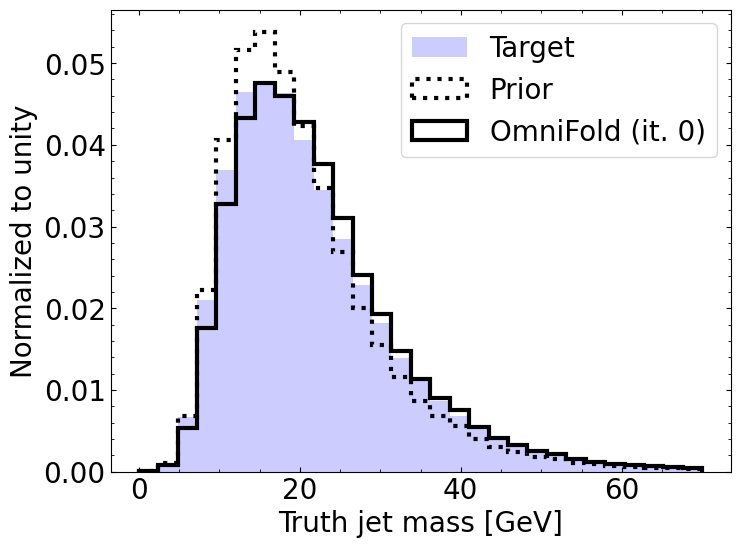

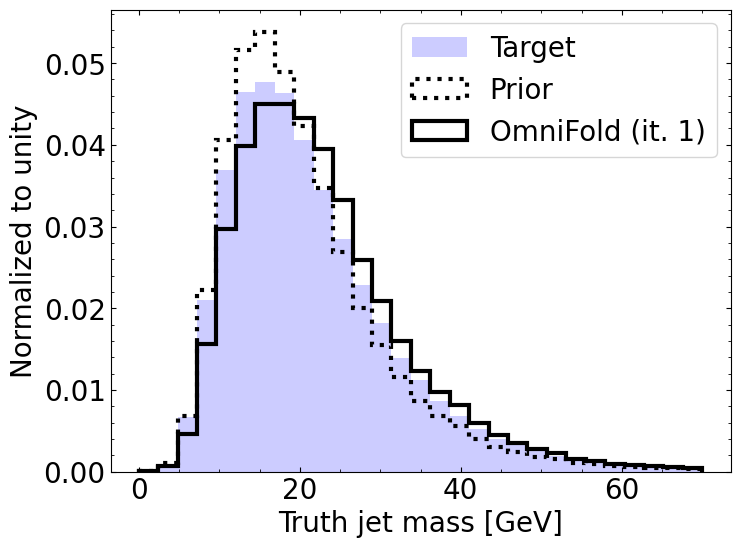

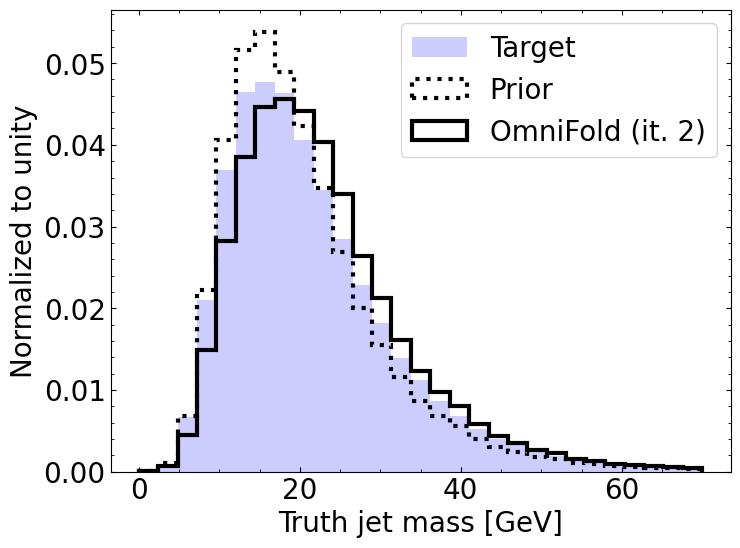

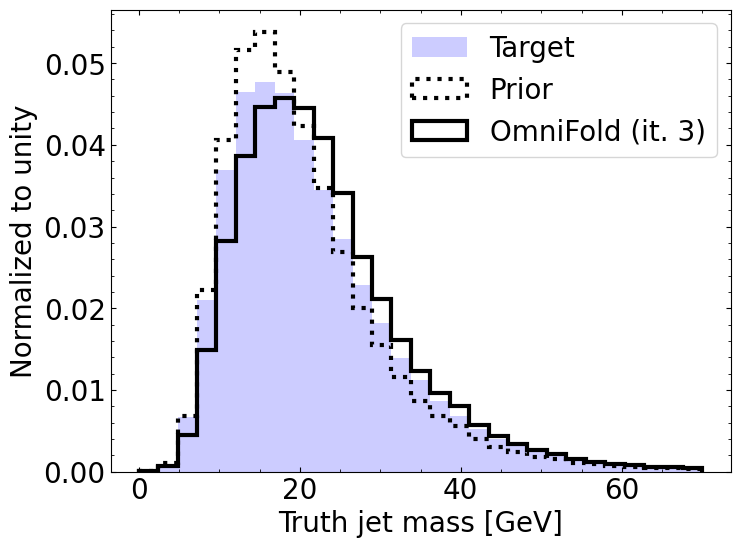

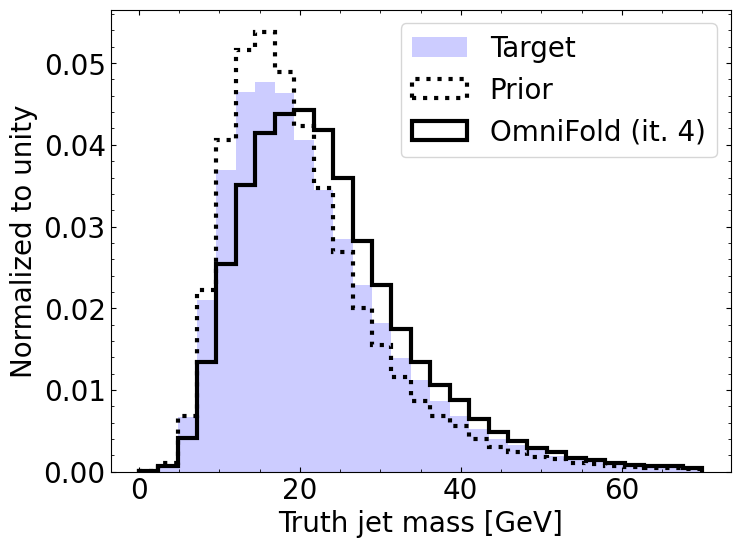

In [6]:
for i in range(iterations):
    fig = plt.figure(figsize=(8, 6)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    OF,_,_  = plt.hist(m_true_alt,bins=np.linspace(0,70,30),color="blue",label="Target",density=True,alpha=0.2)
    T,_,_  = plt.hist(m_true,bins=np.linspace(0,70,30),ls=":",histtype="step",color="black",lw=3,label="Prior",density=True)
    G,_,_ = plt.hist(m_true,weights=weights[i,1],bins=np.linspace(0,70,30),lw=3,histtype="step",ls="-",color="black",label="OmniFold (it. "+str(i)+")",density=True)
    plt.legend()
    plt.xlabel("Truth jet mass [GeV]")
    plt.ylabel("Normalized to unity")

    fig.savefig('figures/OmniFold_iteration_'+str(i)+'.pdf',bbox_inches='tight')

In [7]:
myweights = of.omnifold(theta0,theta_unknown_S,2,model)

NameError: name 'of' is not defined

In [ ]:
_,_,_=plt.hist(theta0_G,bins = bins,color='blue',alpha=0.5,label="MC, true")
_,_,_=plt.hist(theta_unknown_G,bins = bins,color='orange',alpha=0.5,label="Data, true")
_,_,_=plt.hist(theta0_G,weights=myweights[-1, 0, :], bins = bins,color='black',histtype="step",label="OmniFolded",lw="2")
plt.xlabel("x")
plt.ylabel("events")
plt.legend(frameon=False)

In [ ]:
print("Moment predictions:")
print("Gen Mean:", np.average(theta0_G))
print("Truth Mean:", np.average(theta_unknown_G))
print("Unfolded Gen Mean:", np.average(theta0_G,weights=myweights[-1, 0, :]))

In [ ]:
1+1